# Online Payments Fraud Detection

In this project I will solve a classification problem on online fraud payments detection using machine learning. For this task, I collected a [dataset](https://www.kaggle.com/datasets/ealaxi/paysim1?resource=download) from Kaggle, which contains historical information about fraudulent transactions which can be used to detect fraud in online payments.

Below are all the columns from the dataset I’m using here:

- *step*: represents a unit of time where 1 step equals 1 hour
- *type*: type of online transaction
- *amount*: the amount of the transaction
- *nameOrig*: customer starting the transaction
- *oldbalanceOrg*: balance before the transaction
- *newbalanceOrig*: balance after the transaction
- *nameDest*: recipient of the transaction
- *oldbalanceDest*: initial balance of recipient before the transaction
- *newbalanceDest*: the new balance of recipient after the transaction
- *isFraud*: fraud transaction

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r'D:\onlinefraud\onlinefraud.csv')

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
# drop isFlaggedFraud columns
df = df.drop('isFlaggedFraud', axis = 1)

In [7]:
df.shape

(6362620, 10)

In [8]:
# describe()
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [9]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [10]:
df.duplicated(subset=None).sum()

0

In [11]:
# null value
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [12]:
# correlation
df.corr(numeric_only=True)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


In [13]:
# count unique value dataframe
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
dtype: int64

-----
----
## Exploratory Data Analysis and Visualization

In [14]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [15]:
# convert column isFraud 0 > No Fraud and 1 > Fraud
df['Fraud'] = df['isFraud'].map({0:'No Fraud', 1:'Fraud'})

In [16]:
df.head(4)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,Fraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,No Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,No Fraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,Fraud
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Fraud


-----
------
## Step

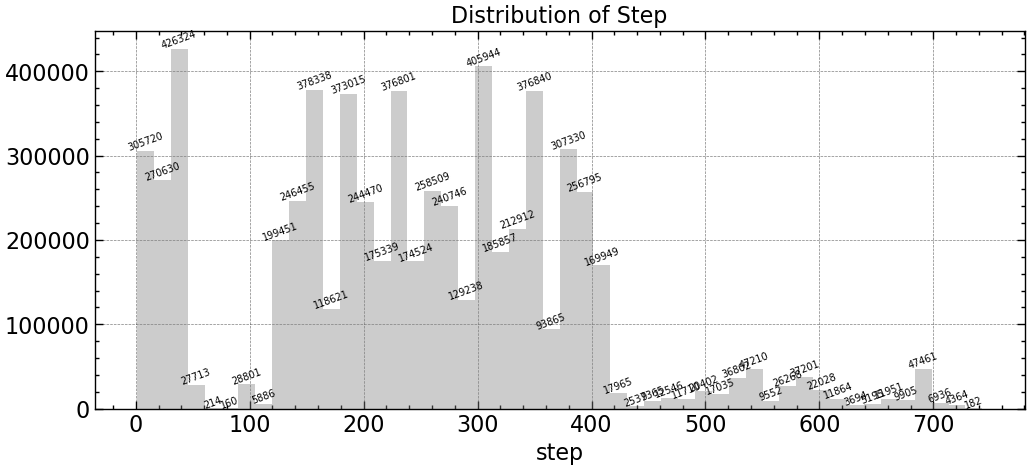

In [17]:
plt.style.use(['science','notebook','grid'])

plt.figure(figsize=(12, 5), dpi=100)

ax = sns.distplot(df['step'],  kde=False, color='gray')
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + (p.get_width()/2),
                y = height+ 100,
                    s =  '{:.0f}'.format(height),
                    ha = 'center',
                    size = 7,
                    rotation = 20)
plt.title('Distribution of Step')
plt.show()

In [18]:
df_fraud = df[df['Fraud']== 'Fraud']
df_fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,Fraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,Fraud
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,Fraud
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,Fraud
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,Fraud
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,Fraud


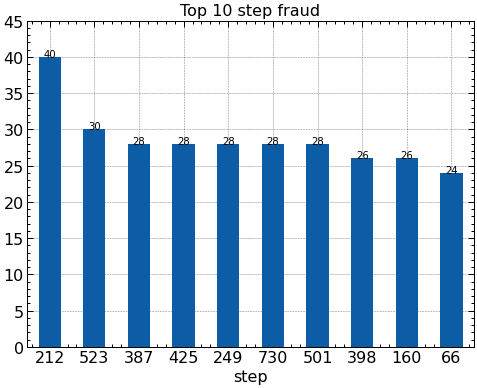

In [19]:
df_fraud = df[df['Fraud']== 'Fraud']
ax = df_fraud['step'].value_counts().head(10).plot(kind='bar')
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2, 
            y = height, 
            s = '{:.0f}'.format(height), 
            ha = 'center'
           )
plt.xticks(rotation =0)
plt.ylim(0,45)
plt.title('Top 10 step fraud')
plt.show()

Dari daftar top 10 Step yang melakukan kegiatan `Fraud` Step `212` paling banyak melakukan `Fraud` sebanyak `40 kali`

--------
--------
## Type

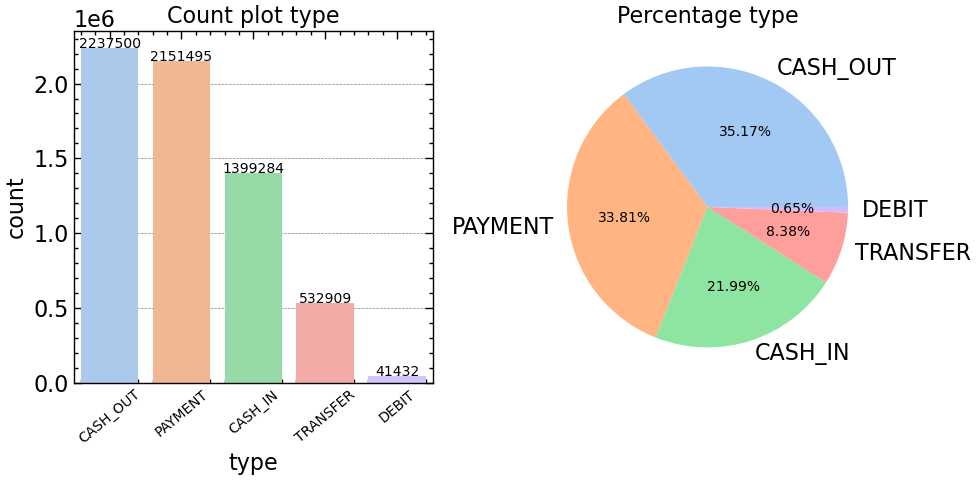

In [20]:
plt.figure(figsize=(10,5), dpi=100)

variable = 'type'

plt.subplot(1,2,1)
ax = sns.countplot(x=variable, data= df, order = df[variable].value_counts().index,  palette = 'pastel')
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2,
            y = height,
            s = '{:.0f}'.format(height),
            ha = 'center'
            )
plt.title(f'Count plot {variable}')
plt.xticks(rotation= 40, size = 10)

# pie chart

plt.subplot(1,2,2)
counts = df[variable].value_counts()
colors = sns.color_palette('pastel')
plt.pie(counts,labels = counts.index, colors= colors, autopct='%.2f%%')
plt.title(f'Percentage {variable}')


plt.tight_layout()
plt.show()

Dapat di lihat transaksi `CASH OUT` merupakan jumlah transaksi terbanyak dengan `jumlah 2237500 transaksi` mungkin di sebabkan kemudahan dalam bertransaksi  dibandingkan dengan metode pembayaran yang membutuhkan akses bank

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


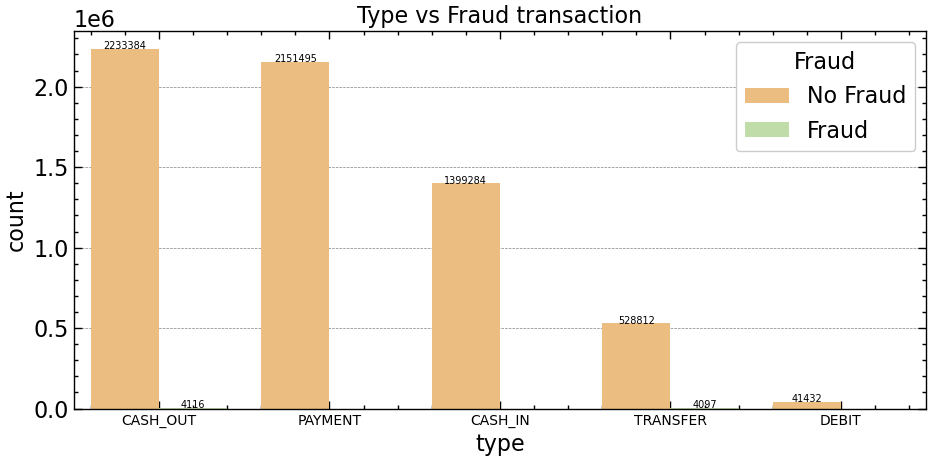

In [21]:
plt.figure(figsize=(11,5), dpi=100)

ax = sns.countplot(x='type', data = df, order = df['type'].value_counts().index,hue='Fraud',  palette='Spectral')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2,
            y = height  ,
            s = '{:.0f}'.format(height),
            ha = 'center',
            size = 7
            )
plt.title('Type vs Fraud transaction')
plt.xticks(size = 10)
plt.show()

Dari 5 metode pembayaran yang terindikasi `Fraud` di traksasi `CASH OUT sebanyak 4116` mungkin transksi cast out lebih mudah melakukan kegiatan Fraud dibandingkan dengan transaksi jenis lainnya dan `TRANSFER sebesar 4097` Transaksi, selebihnya 0 atau `Nihil`

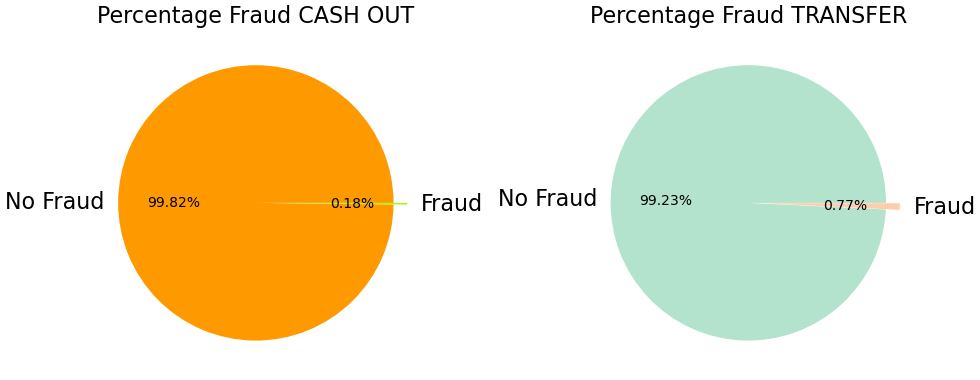

In [22]:
plt.figure(figsize=(10,5), dpi=100)

plt.subplot(1,2,1)

fraud_cashout = df[df['type'] == 'CASH_OUT']
counts = fraud_cashout['Fraud'].value_counts()
colors = sns.color_palette('gist_rainbow')
explode = [0, 0.1]
plt.pie(counts, labels = counts.index, autopct='%0.2f%%', colors= colors, explode=explode)
plt.title('Percentage Fraud CASH OUT')


plt.subplot(1,2,2)

fraud_cashout = df[df['type'] == 'TRANSFER']
counts = fraud_cashout['Fraud'].value_counts()
colors = sns.color_palette('Pastel2')
explode = [0, 0.1]
plt.pie(counts, labels = counts.index, autopct='%0.2f%%', colors= colors, explode=explode)
plt.title('Percentage Fraud TRANSFER')

plt.tight_layout()
plt.show()

Persentase Fraud pada CASH OUT sebesar `0.18%` Sedangkan Fraud pada TRANSFER sebesar `0.77%`

-----
-----
## Amount

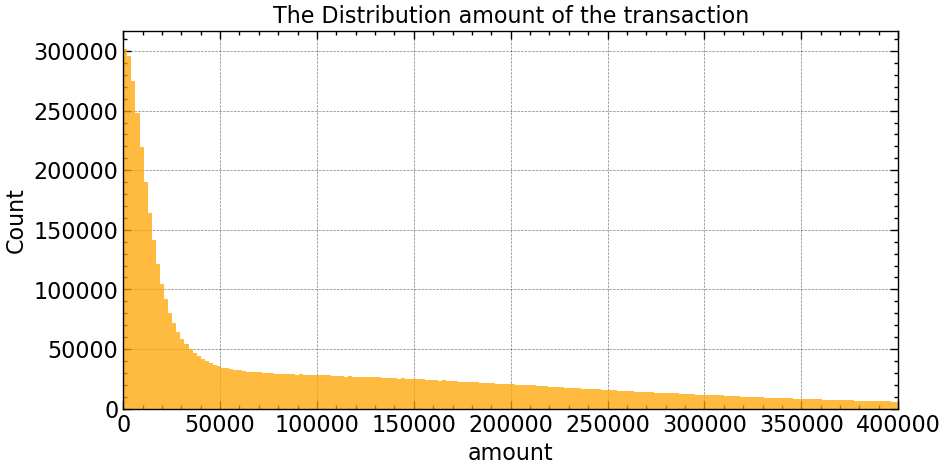

In [23]:
plt.figure(figsize=(10, 5), dpi=100)

sns.histplot(df['amount'], kde=False, color='orange')
plt.xlim(0, 400000)
plt.title('The Distribution amount of the transaction')

plt.show()

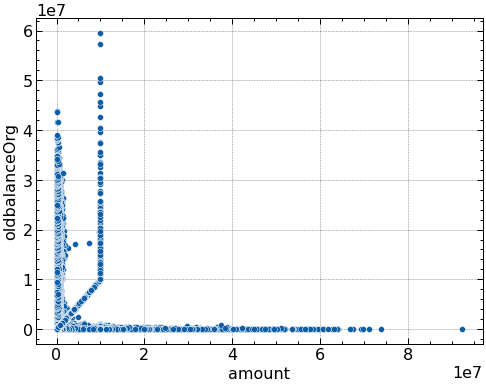

In [24]:
sns.scatterplot(x='amount', y='oldbalanceOrg', data =df);

------------
-----------

## Fraud / isFraud

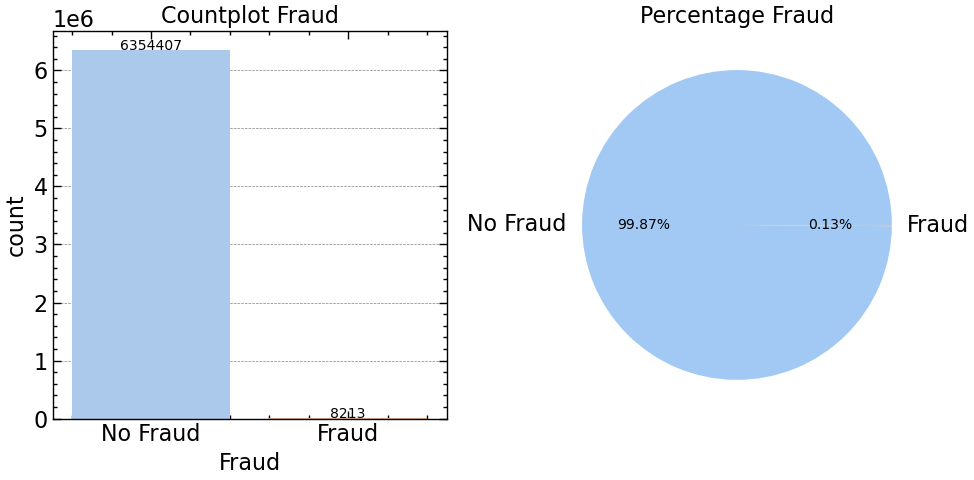

In [25]:
plt.figure(figsize=(10,5), dpi=100)
variable = 'Fraud'

plt.subplot(1,2,1)
ax = sns.countplot(x=variable, data= df, palette='pastel')
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2,
            y = height,
            s = '{:.0f}'.format(height),
            ha =  'center'
            )
plt.title(f'Countplot {variable}')

# pie chart
plt.subplot(1,2,2)

counts = df[variable].value_counts()
colors = sns.color_palette('pastel')
plt.pie(counts,labels= counts.index, colors= colors, autopct ="%.2f%%")
plt.title(f'Percentage {variable}')

plt.tight_layout()
plt.show()

Dari gambar diatas menunjukan Terdapat data `imbalance` dengan percentase `No Fraud 99.87%` dan `Fraud 0.13%`

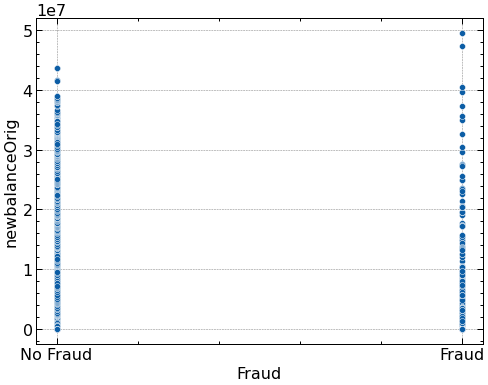

In [26]:
sns.scatterplot(x='Fraud', y = 'newbalanceOrig', data=df);

In [27]:
# drop raud columns
df = df.drop('Fraud', axis=1)
df.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1


In [28]:
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [29]:
# convert type column 
df['type'] = df['type'].map({'PAYMENT':1,'TRANSFER':2 ,'CASH_OUT':3, 'DEBIT':4, 'CASH_IN':5})

In [30]:
df.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,2,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1


In [31]:
# correcation
df.corr(numeric_only=True)['isFraud'].sort_values()

newbalanceOrig   -0.008148
oldbalanceDest   -0.005885
type             -0.004463
newbalanceDest    0.000535
oldbalanceOrg     0.010154
step              0.031578
amount            0.076688
isFraud           1.000000
Name: isFraud, dtype: float64

In [32]:
plt.style.use(['science','notebook','grid'])

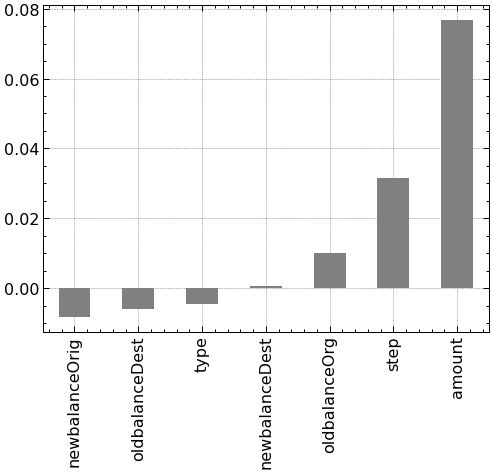

In [33]:
df.corr(numeric_only=True)['isFraud'][:-1].sort_values().plot(kind='bar', color='gray');

<Figure size 800x700 with 0 Axes>

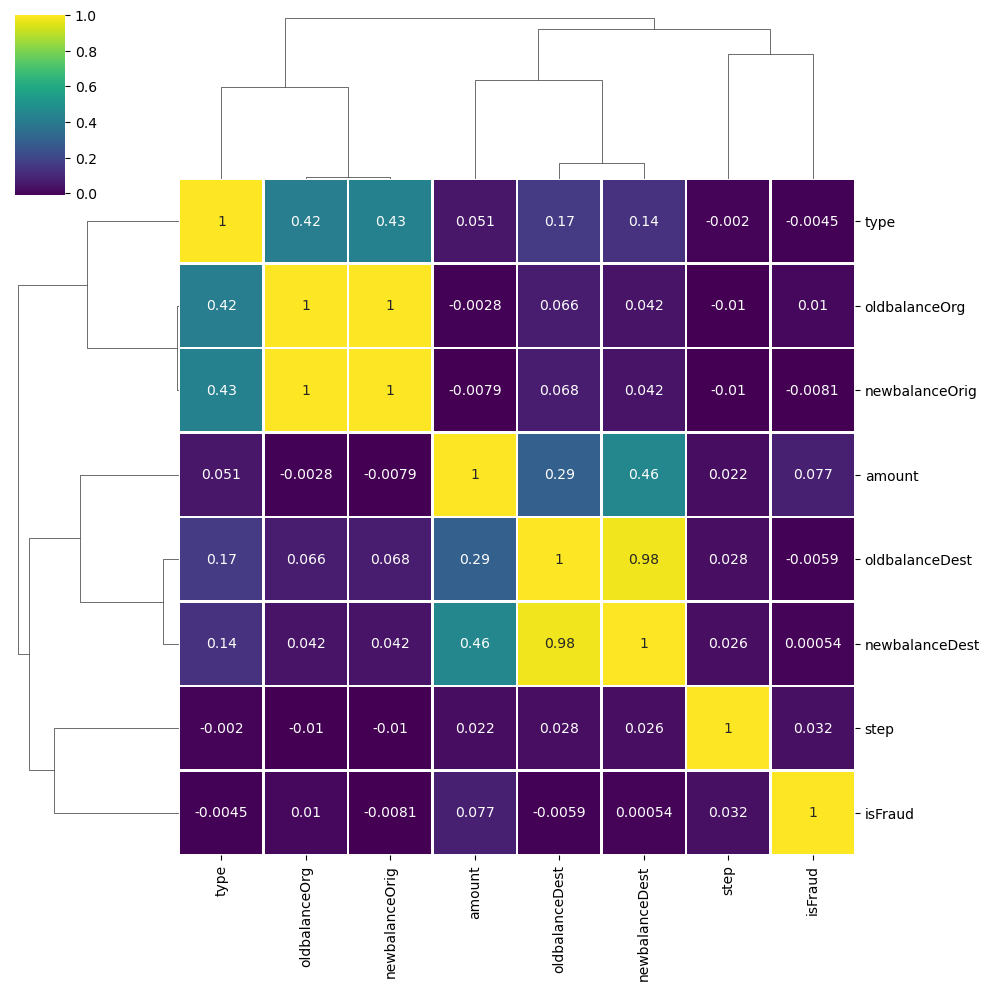

In [34]:
plt.style.use('default')
plt.figure(figsize=(8,7), dpi=100)

sns.clustermap(df.corr(numeric_only=True), annot=True, lw=1, cmap='viridis');

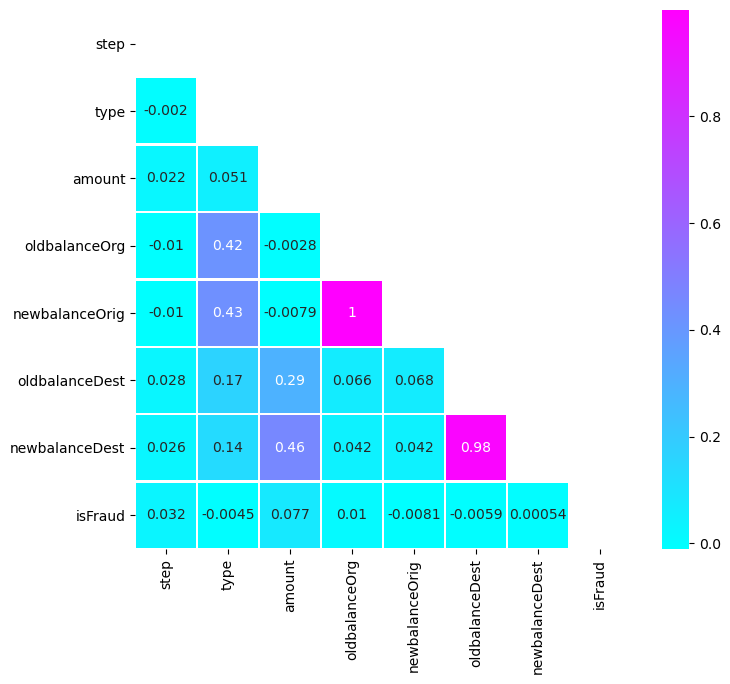

In [35]:
plt.figure(figsize=(8,7), dpi=100)

matrix = df.corr(numeric_only=True)

mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)]=True

sns.heatmap(matrix, mask=mask, annot=True, lw=1, cmap='cool');

In [36]:
df.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,2,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1


In [37]:
# drop columns nameOrig and nameDest
df = df.drop(['nameOrig','nameDest'], axis=1)

In [38]:
# convert coumn is Fraud
df['isFraud'] = df['isFraud'].map({0:'is Not Fraud', 1:'is Fraud'})

In [39]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,1,9839.64,170136.0,160296.36,0.0,0.0,is Not Fraud
1,1,1,1864.28,21249.0,19384.72,0.0,0.0,is Not Fraud
2,1,2,181.00,181.0,0.00,0.0,0.0,is Fraud
3,1,3,181.00,181.0,0.00,21182.0,0.0,is Fraud
4,1,1,11668.14,41554.0,29885.86,0.0,0.0,is Not Fraud


## Create New DataFrame
Dikarenakan datasetnya terlalu besar membuat training datanya terlalu lama maka saya membuat datasetnya menjadi lebih kecil,untuk mempercepat training data

In [40]:
current_ratio = df['isFraud'].value_counts(normalize=True)
current_ratio

isFraud
is Not Fraud    0.998709
is Fraud        0.001291
Name: proportion, dtype: float64

In [41]:
new_df_size = 30000
is_not_fraud, is_fraud = np.ceil(new_df_size * current_ratio).astype(int)

In [42]:
df_is_not_fraud = df[df['isFraud'] == 'is Not Fraud'].sample(is_not_fraud)
df_is_fraud = df[df['isFraud']== 'is Fraud'].sample(is_fraud)
new_df = pd.concat([df_is_not_fraud,df_is_fraud], ignore_index=True)
new_df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,297,3,563880.75,13193.37,0.00,673436.95,1237317.70,is Not Fraud
1,158,1,2862.93,433366.81,430503.88,0.00,0.00,is Not Fraud
2,356,5,419090.81,1466169.95,1885260.75,2390815.50,1971724.69,is Not Fraud
3,229,3,49043.33,0.00,0.00,4061803.82,4110847.15,is Not Fraud
4,307,5,408636.67,3050905.54,3459542.21,5364807.98,4956171.31,is Not Fraud


In [43]:
new_df.shape

(30001, 8)

In [44]:
new_df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

## Train Test Split Data

In [45]:
X = new_df.drop('isFraud', axis =1)
y = new_df['isFraud']

In [46]:
y.value_counts()

isFraud
is Not Fraud    29962
is Fraud           39
Name: count, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Preprocesssing

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()

In [51]:
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

## Create Model Machine Learning

In [52]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

#
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# matrix ml
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

## LogisticRegressionCV

In [53]:
lr_clf = LogisticRegressionCV(class_weight='balanced')

In [54]:
lr_clf.fit(X_train_scaler, y_train)

LogisticRegressionCV(class_weight='balanced')

In [55]:
lr_clf.C_

array([10000.])

In [56]:
lr_clf.get_params()

{'Cs': 10,
 'class_weight': 'balanced',
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [57]:
lr_clf_predict = lr_clf.predict(X_test_scaler)

## Model Performance and Evaluation LogisticRegressionCV

In [58]:
accuracy_score(y_test, lr_clf_predict)

0.9903349441759707

In [59]:
confusion_matrix(y_test, lr_clf_predict)

array([[   9,    1],
       [  57, 5934]], dtype=int64)

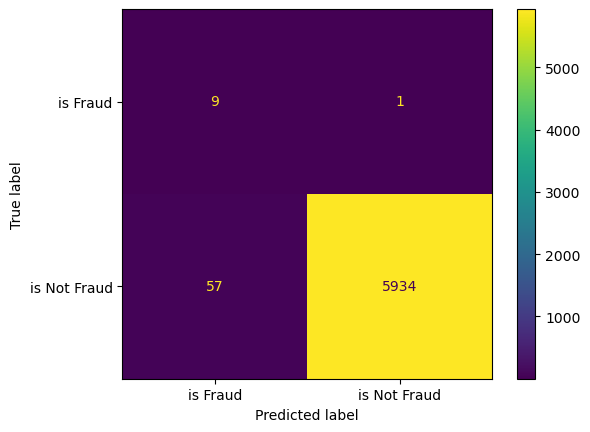

In [60]:
plot_confusion_matrix(lr_clf, X_test_scaler,y_test);

In [61]:
print(classification_report(y_test, lr_clf_predict))

              precision    recall  f1-score   support

    is Fraud       0.14      0.90      0.24        10
is Not Fraud       1.00      0.99      1.00      5991

    accuracy                           0.99      6001
   macro avg       0.57      0.95      0.62      6001
weighted avg       1.00      0.99      0.99      6001



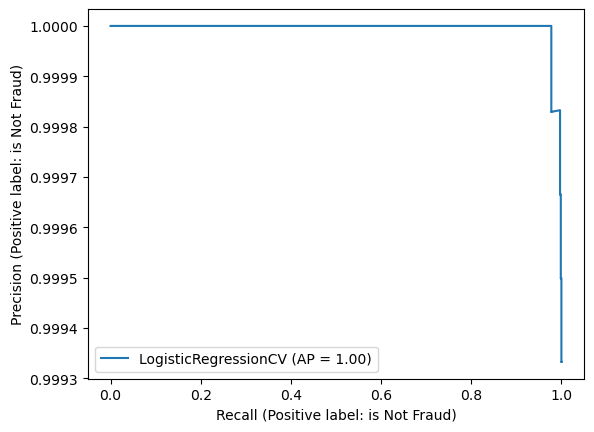

In [62]:
plot_precision_recall_curve(lr_clf, X_test_scaler,y_test);

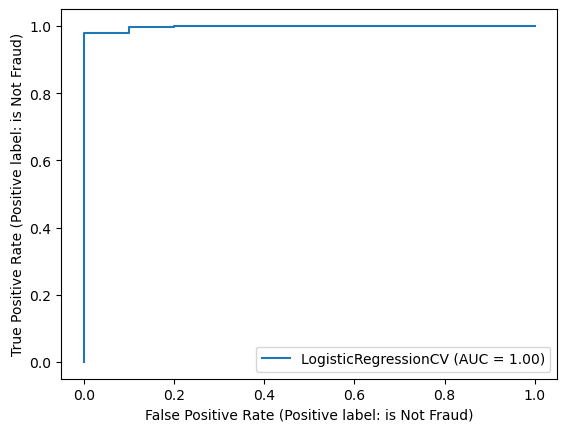

In [63]:
plot_roc_curve(lr_clf, X_test_scaler,y_test);

--------
----------
## K NeighborsClassifier

In [64]:
knn = KNeighborsClassifier()

In [65]:
operation  = [('scaler',scaler), ('knn', knn)]

In [66]:
pipe = Pipeline(operation)

In [67]:
k_values = list(range(1, 25))

In [68]:
param_grid = {'knn__n_neighbors':k_values}

In [69]:
knn_grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [70]:
knn_grid.fit(X_train_scaler, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24]},
             scoring='accuracy')

In [71]:
knn_grid.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [72]:
knn_grid.best_score_

0.9987916666666667

In [73]:
knn_grid_predict= knn_grid.predict(X_test_scaler)

## Model Performance and Evaluation KNeighborsClassifier

In [74]:
accuracy_score(y_test,knn_grid_predict)

0.9983336110648225

In [75]:
confusion_matrix(y_test,knn_grid_predict)

array([[   0,   10],
       [   0, 5991]], dtype=int64)

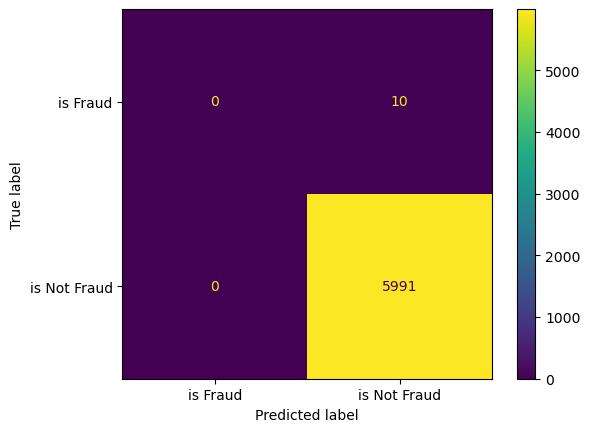

In [76]:
plot_confusion_matrix(knn_grid,X_test_scaler,y_test);

In [77]:
print(classification_report(y_test,knn_grid_predict))

              precision    recall  f1-score   support

    is Fraud       0.00      0.00      0.00        10
is Not Fraud       1.00      1.00      1.00      5991

    accuracy                           1.00      6001
   macro avg       0.50      0.50      0.50      6001
weighted avg       1.00      1.00      1.00      6001



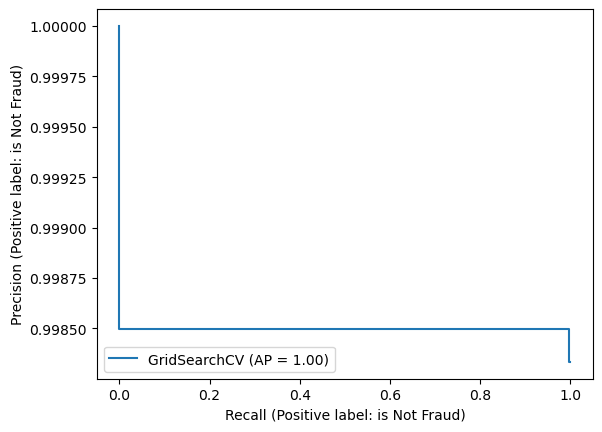

In [78]:
plot_precision_recall_curve(knn_grid,X_test_scaler,y_test);

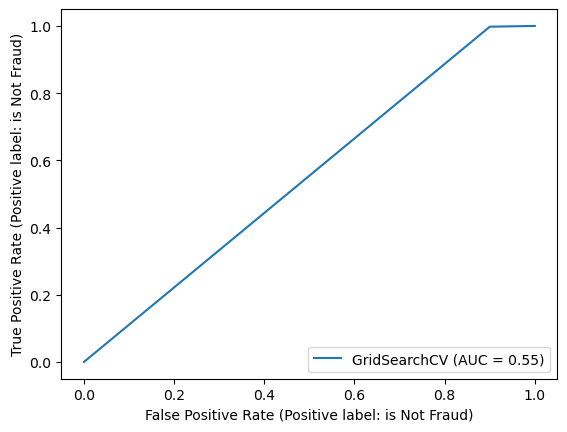

In [79]:
plot_roc_curve(knn_grid,X_test_scaler,y_test);

---------
----------
## Suport Vector Classifier(SVC)

In [80]:
svc = SVC(class_weight = 'balanced')

In [81]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 5, 10,15],
              'kernel' : ['linear','rbf', 'poly'],
              'gamma': ['scale','auto'],
              'degree' : [2,3,4]
             }

In [82]:
svc_grid = GridSearchCV(svc, param_grid)

In [83]:
svc_grid.fit(X_train_scaler,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 15],
                         'degree': [2, 3, 4], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [84]:
svc_grid.best_estimator_.get_params()

{'C': 0.001,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 4,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [85]:
svc_grid.best_score_

0.9824166666666667

In [86]:
svcgrid_predict = svc_grid.predict(X_test_scaler)

## Model Performance and Evaluation Suport Vector Classifier(SVC)

In [87]:
accuracy_score(y_test,svcgrid_predict)

0.9725045825695717

In [88]:
confusion_matrix(y_test,svcgrid_predict)

array([[   2,    8],
       [ 157, 5834]], dtype=int64)

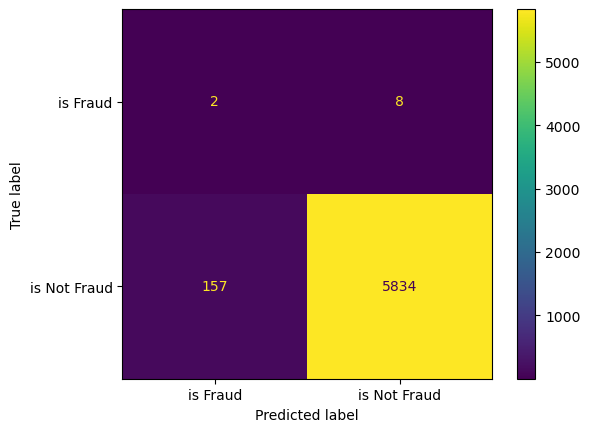

In [89]:
plot_confusion_matrix(svc_grid, X_test_scaler,y_test);

In [90]:
print(classification_report(y_test,svcgrid_predict))

              precision    recall  f1-score   support

    is Fraud       0.01      0.20      0.02        10
is Not Fraud       1.00      0.97      0.99      5991

    accuracy                           0.97      6001
   macro avg       0.51      0.59      0.50      6001
weighted avg       1.00      0.97      0.98      6001



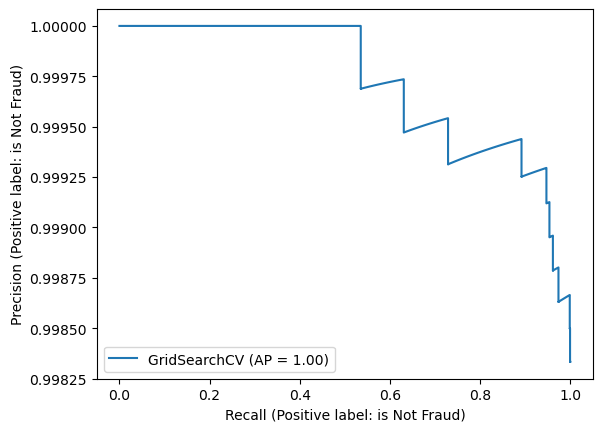

In [91]:
plot_precision_recall_curve(svc_grid,X_test_scaler,y_test);

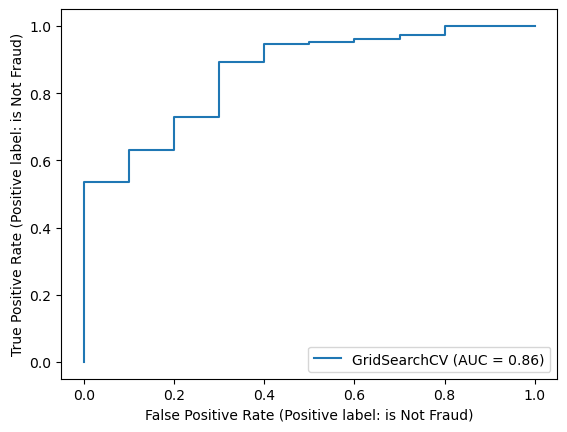

In [92]:
plot_roc_curve(svc_grid, X_test_scaler,y_test);

-----------------
------------
## DecisionTreeClassifier

In [93]:
dtree_clf = DecisionTreeClassifier(class_weight='balanced')

In [94]:
param_grid ={'criterion' : ['gini','entropy'],
             'max_depth' : [2,3,4],
             'max_features': [1,2,3,4,5,None]             
            }

In [95]:
dtree_grid = GridSearchCV(dtree_clf,param_grid,cv=5,n_jobs= -1)

In [96]:
dtree_grid.fit(X_train_scaler, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'max_features': [1, 2, 3, 4, 5, None]})

In [97]:
dtree_grid.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [98]:
dtree_grid.best_score_

0.9787916666666666

In [99]:
dtreegrid_predict = dtree_grid.predict(X_test_scaler)

## Model Performance and Evaluation DecisionTreeClassifier


In [100]:
accuracy_score(y_test,dtreegrid_predict)

0.9851691384769206

In [101]:
confusion_matrix(y_test,dtreegrid_predict)

array([[   8,    2],
       [  87, 5904]], dtype=int64)

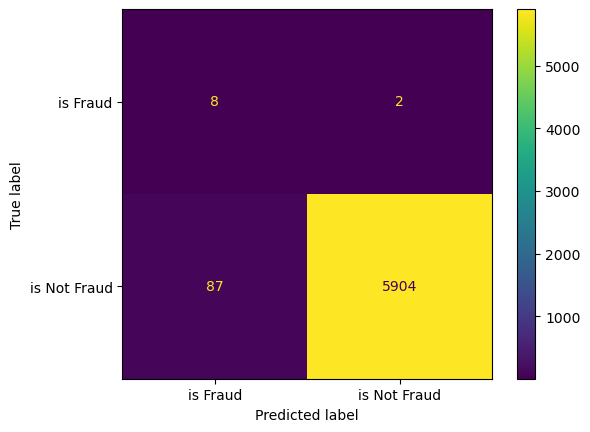

In [102]:
plot_confusion_matrix(dtree_grid,X_test_scaler,y_test);

In [103]:
print(classification_report(y_test,dtreegrid_predict))

              precision    recall  f1-score   support

    is Fraud       0.08      0.80      0.15        10
is Not Fraud       1.00      0.99      0.99      5991

    accuracy                           0.99      6001
   macro avg       0.54      0.89      0.57      6001
weighted avg       1.00      0.99      0.99      6001



## Feature importances

In [104]:
dtree_grid.best_estimator_.feature_importances_

array([0.10443498, 0.        , 0.        , 0.40274033, 0.4270587 ,
       0.01122263, 0.05454337])

In [105]:
imp_faetures = pd.DataFrame(data = dtree_grid.best_estimator_.feature_importances_,
                            index= X.columns,
                            columns = ['Feature Importances']
                           )

In [106]:
imp_faetures.sort_values('Feature Importances', ascending=False)

,Feature Importances
newbalanceOrig,0.427059
oldbalanceOrg,0.402740
step,0.104435
newbalanceDest,0.054543
oldbalanceDest,0.011223
type,0.000000
amount,0.000000


In [107]:
imp_faetures = imp_faetures[imp_faetures['Feature Importances'] > 0].sort_values('Feature Importances')

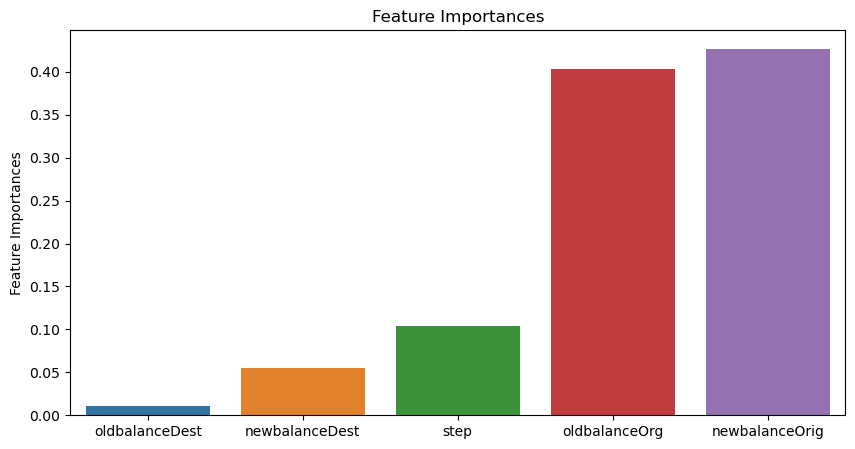

In [108]:
plt.figure(figsize=(10,5), dpi=100)
ax = sns.barplot(data = imp_faetures, x = imp_faetures.index, y= 'Feature Importances')
plt.title('Feature Importances');

In [109]:
from sklearn.tree import plot_tree

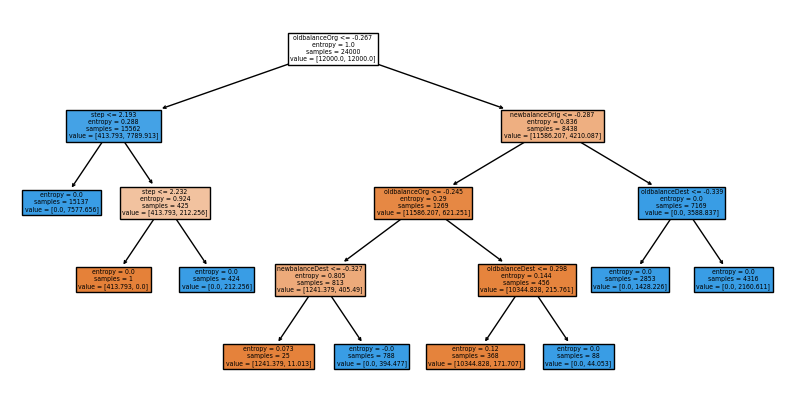

In [110]:
plt.figure(figsize=(10, 5), dpi=100)
plot_tree(dtree_grid.best_estimator_, filled = True, feature_names = X.columns);

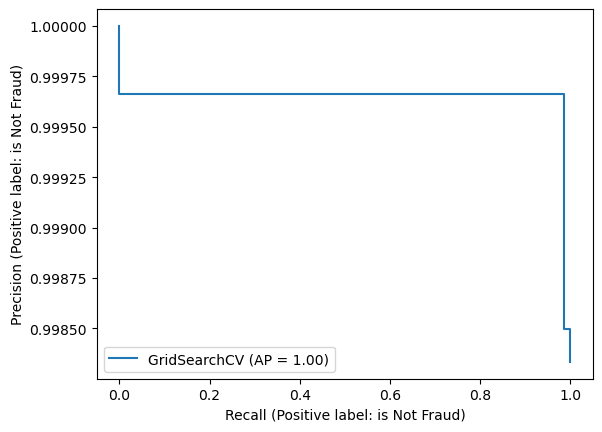

In [111]:
plot_precision_recall_curve(dtree_grid,X_test_scaler,y_test);

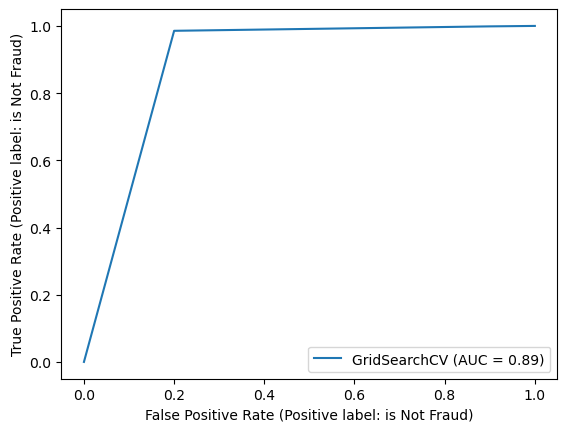

In [112]:
plot_roc_curve(dtree_grid,X_test_scaler,y_test);

## RandomForestClassifier

In [113]:
rforest_clf = RandomForestClassifier(class_weight='balanced')

In [114]:
param_grid = {'n_estimators': [int(x) for x in np.linspace(10,300,6)],
              'max_features' :[2,3,4, 'auto', 'sqrt','log2'],
             }

In [115]:
rforest_grid = GridSearchCV(rforest_clf, param_grid)

In [116]:
rforest_grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_features': [2, 3, 4, 'auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 68, 126, 184, 242, 300]})

In [117]:
rforest_grid.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 3,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 184,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [118]:
rforest_grid.best_score_

0.9994999999999999

In [119]:
rforestgrid_predict = rforest_grid.predict(X_test)

## Model Performance and Evaluation RandomForestClassifier

In [120]:
accuracy_score(y_test,rforestgrid_predict)

0.9990001666388936

In [121]:
confusion_matrix(y_test,rforestgrid_predict)

array([[   4,    6],
       [   0, 5991]], dtype=int64)

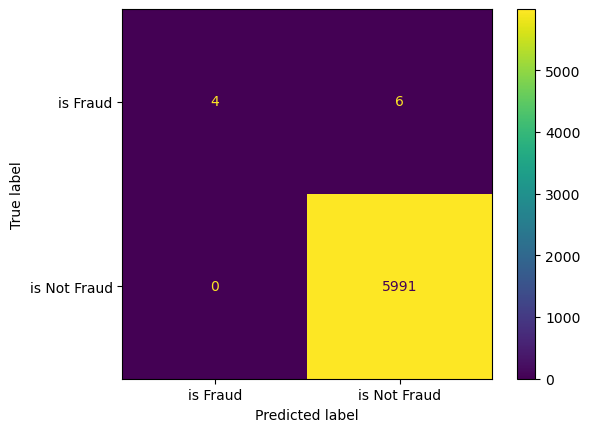

In [122]:
plot_confusion_matrix(rforest_grid, X_test,y_test);

In [123]:
print(classification_report(y_test,rforestgrid_predict))

              precision    recall  f1-score   support

    is Fraud       1.00      0.40      0.57        10
is Not Fraud       1.00      1.00      1.00      5991

    accuracy                           1.00      6001
   macro avg       1.00      0.70      0.79      6001
weighted avg       1.00      1.00      1.00      6001



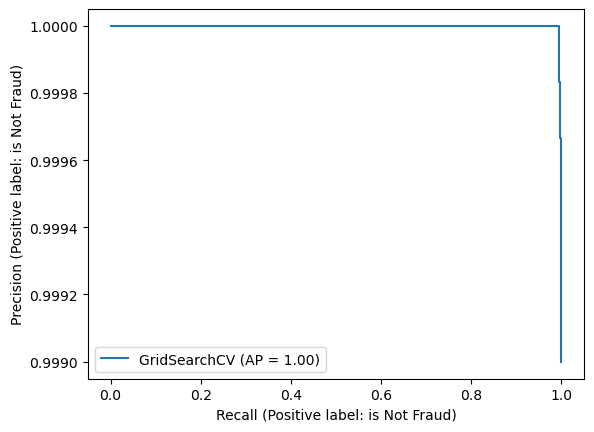

In [124]:
plot_precision_recall_curve(rforest_grid,X_test,y_test);

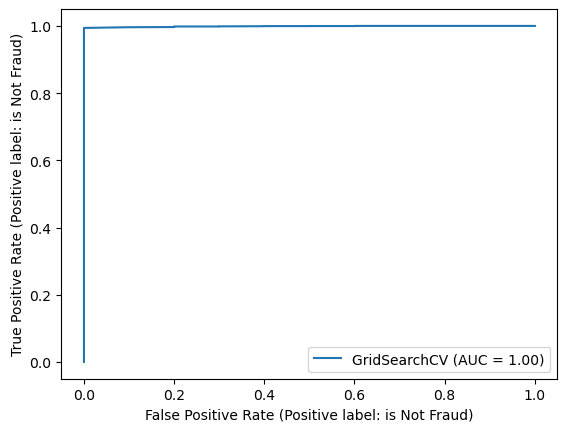

In [125]:
plot_roc_curve(rforest_grid,X_test,y_test);

----------
---------
## AdaBoostClassifier

In [126]:
ada_clf = AdaBoostClassifier()

In [127]:
param_grid = {'n_estimators': [int(x) for x in np.linspace(50,300,7)]}

In [128]:
ada_grid = GridSearchCV(ada_clf, param_grid)

In [129]:
ada_grid.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [50, 91, 133, 175, 216, 258, 300]})

In [130]:
ada_grid.best_estimator_.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [131]:
ada_grid.best_score_

0.9995416666666668

In [132]:
ada_predict = ada_grid.predict(X_test)

--------
-------

## Model Performance and Evaluation AdaBoostClassifier

In [133]:
accuracy_score(y_test, ada_predict)

0.9990001666388936

In [134]:
confusion_matrix(y_test, ada_predict)

array([[   6,    4],
       [   2, 5989]], dtype=int64)

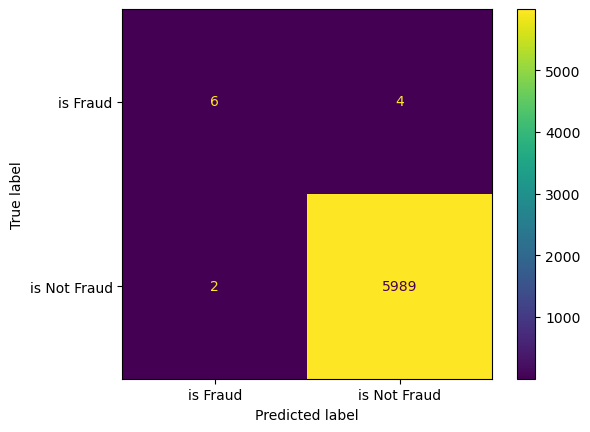

In [135]:
plot_confusion_matrix(ada_grid, X_test, y_test);

In [136]:
print(classification_report(y_test,ada_predict))

              precision    recall  f1-score   support

    is Fraud       0.75      0.60      0.67        10
is Not Fraud       1.00      1.00      1.00      5991

    accuracy                           1.00      6001
   macro avg       0.87      0.80      0.83      6001
weighted avg       1.00      1.00      1.00      6001



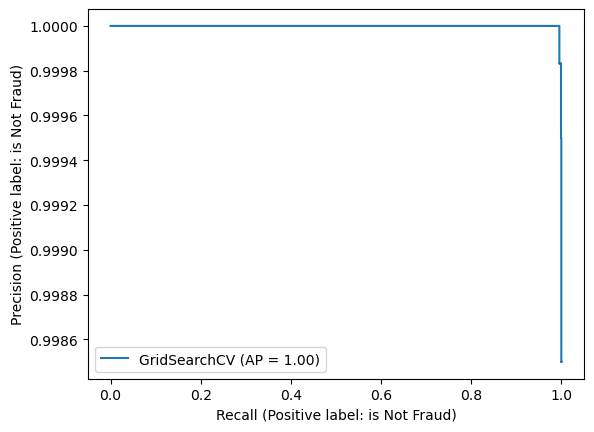

In [137]:
plot_precision_recall_curve(ada_grid,X_test,y_test);

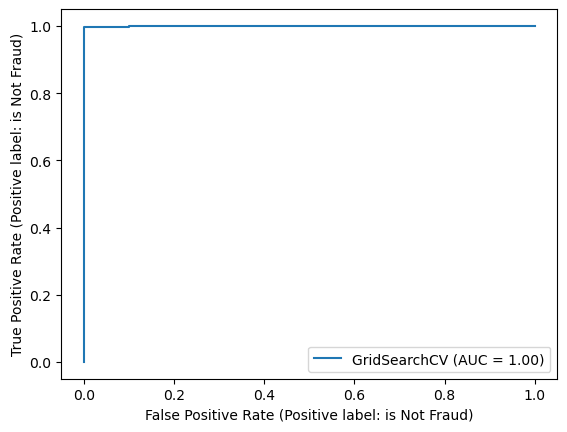

In [138]:
plot_roc_curve(ada_grid, X_test,y_test);

-----------
-------
## GradienBoostingClassifier

In [139]:
gradient_clf = GradientBoostingClassifier()

In [140]:
param_grid = {'n_estimators': [int(x) for x in np.linspace(50,300,7)]}

In [141]:
gradien_grid = GridSearchCV(gradient_clf,param_grid)

In [142]:
gradien_grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [50, 91, 133, 175, 216, 258, 300]})

In [143]:
gradien_grid.best_estimator_

GradientBoostingClassifier(n_estimators=258)

In [144]:
gradien_grid.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 258,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [145]:
gradien_grid.best_score_

0.9989166666666668

In [146]:
gradien_predict = gradien_grid.predict(X_test)

------
-------

## Model Performance and Evaluation GradienBoostingClassifier

In [147]:
accuracy_score(y_test,gradien_predict)

0.9983336110648225

In [148]:
confusion_matrix(y_test,gradien_predict)

array([[   1,    9],
       [   1, 5990]], dtype=int64)

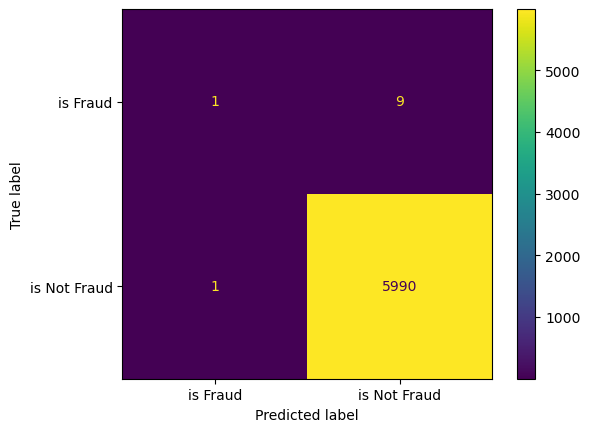

In [149]:
plot_confusion_matrix(gradien_grid,X_test,y_test);

In [150]:
print(classification_report(y_test,gradien_predict))

              precision    recall  f1-score   support

    is Fraud       0.50      0.10      0.17        10
is Not Fraud       1.00      1.00      1.00      5991

    accuracy                           1.00      6001
   macro avg       0.75      0.55      0.58      6001
weighted avg       1.00      1.00      1.00      6001



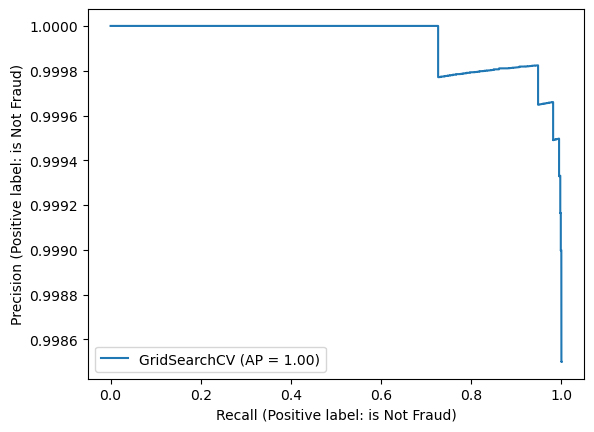

In [151]:
plot_precision_recall_curve(gradien_grid,X_test,y_test);

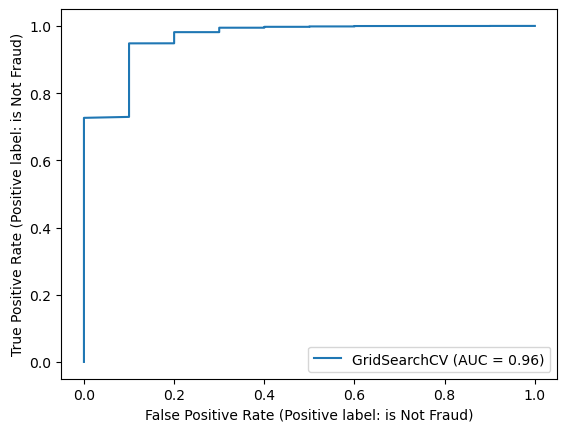

In [152]:
plot_roc_curve(gradien_grid,X_test,y_test);

------
------
## XGBoostClassifier

In [153]:

from sklearn.preprocessing import LabelBinarizer

In [154]:
lb = LabelBinarizer()

In [155]:
y_train1 = lb.fit_transform(y_train)
y_test1 = lb.transform(y_test)

In [156]:
xgb_model  = xgb.XGBClassifier()

In [157]:
param_grid = {"scale_pos_weight" : [int(x) for x in np.linspace(50,300,7)],
              "max_depth" : [2,3,4],
              'objective' : ['Union','Callable','Tuple','binary:logistic']
             }

In [158]:
xgb_grid = GridSearchCV(xgb_model, param_grid, cv=5)

In [159]:
xgb_grid.fit(X_train, y_train1)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=N

In [160]:
xgb_grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [161]:
xgb_grid.best_estimator_.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 4,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': 133,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [162]:
xgb_predict = xgb_grid.predict(X_test)

---------
------------


## Model Performance and Evaluation XGBoostClassifier

In [163]:
accuracy_score(y_test1, xgb_predict)

0.9986668888518581

In [164]:
confusion_matrix(y_test1, xgb_predict)

array([[   3,    7],
       [   1, 5990]], dtype=int64)

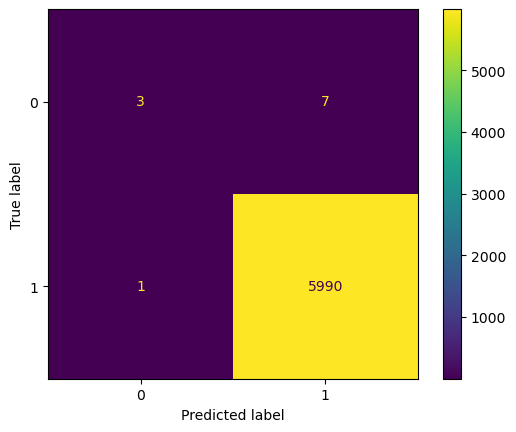

In [165]:
plot_confusion_matrix(xgb_grid,X_test, y_test1)

In [166]:
print(classification_report(y_test1, xgb_predict))

              precision    recall  f1-score   support

           0       0.75      0.30      0.43        10
           1       1.00      1.00      1.00      5991

    accuracy                           1.00      6001
   macro avg       0.87      0.65      0.71      6001
weighted avg       1.00      1.00      1.00      6001



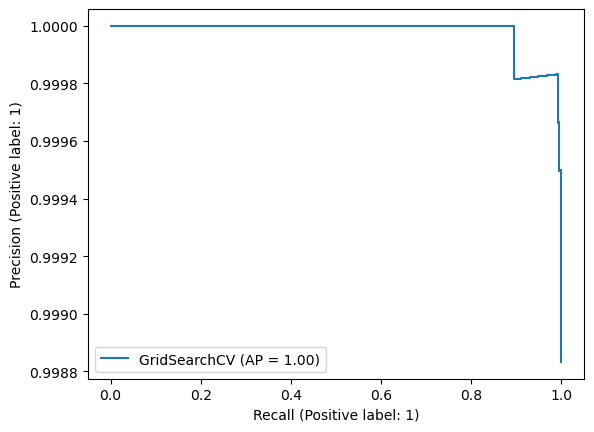

In [167]:
plot_precision_recall_curve(xgb_grid,X_test, y_test1)

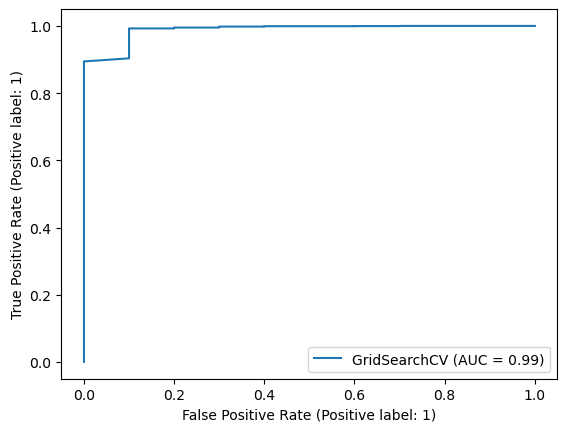

In [168]:
plot_roc_curve(xgb_grid,X_test, y_test1);

---------
----------

## Final Model and Pedictive System 

Hasil performa berbagai model menujukan hasil yang tidak jauh berbeda. Sebagai pertimbangan saya juga mengamati hasil recall dan f1-score yang cenderung positif maka saya memilih `AdaBoostClassifier` menjadi Model Terbaik

In [170]:
new_df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [171]:
new_df[new_df['isFraud'] =='is Fraud'].tail()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
29996,164,3,1627389.26,1627389.26,0.0,327368.64,2039219.38,is Fraud
29997,391,3,172362.84,172362.84,0.0,543266.37,715629.21,is Fraud
29998,377,2,503420.67,503420.67,0.0,0.00,0.00,is Fraud
29999,456,2,760984.58,760984.58,0.0,0.00,0.00,is Fraud
30000,100,2,28871.90,28871.90,0.0,0.00,0.00,is Fraud


In [172]:
new_df.iloc[29999].values

array([456, 2, 760984.58, 760984.58, 0.0, 0.0, 0.0, 'is Fraud'],
      dtype=object)

In [174]:
feature_name = ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest']
features = np.array([[456, 2, 760984.58, 760984.58, 0.0, 0.0, 0.0]])
features_df = pd.DataFrame(features, columns = feature_name)
print(ada_grid.predict(features_df))

['is Fraud']


In [175]:
new_df[new_df['isFraud'] =='is Not Fraud'].tail()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
29957,44,1,7029.07,188248.59,181219.52,0.00,0.00,is Not Fraud
29958,135,3,59216.28,60184.00,967.72,0.00,59216.28,is Not Fraud
29959,251,1,5469.00,0.00,0.00,0.00,0.00,is Not Fraud
29960,187,1,12843.52,9129.00,0.00,0.00,0.00,is Not Fraud
29961,310,2,197204.26,29569.00,0.00,173803.07,371007.33,is Not Fraud


In [178]:
new_df.iloc[29958].values

array([135, 3, 59216.28, 60184.0, 967.72, 0.0, 59216.28, 'is Not Fraud'],
      dtype=object)

In [179]:
feature_name = ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest']
features = np.array([[135, 3, 59216.28, 60184.0, 967.72, 0.0, 59216.28]])
features_df = pd.DataFrame(features, columns = feature_name)
print(ada_grid.predict(features_df))

['is Not Fraud']


## Generate 32 random transactions and predict the transactions

In [180]:
# Define minimum and maximum 'Step' values from your training data
min_step = new_df['step'].min()
max_step = new_df['step'].max()

random_transactions = []

# Generate 32 random transactions

for _ in range(32):
    new_transactions ={
        'step' : np.random.randint(min_step, max_step), 
        'type' : np.random.randint(1, 5),
        'amount' : np.random.uniform(0, 10000), 
        'oldbalanceOrg': np.random.uniform(0,5000),
        'newbalanceOrig' : np.random.uniform(0, 10000),
       'oldbalanceDest' : np.random.uniform(0, 10000),
        'newbalanceDest' : np.random.uniform(0, 10000)       
    }
    random_transactions.append(new_transactions)

random_data = pd.DataFrame(random_transactions, columns= X_train.columns)
random_data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,702,3,2484.822176,65.607752,6096.215061,5736.930938,3110.106665
1,558,4,6626.375243,4142.444808,7966.522665,9288.738495,8171.355788
2,677,4,757.068498,1322.687074,8490.073767,3903.374459,2365.930394
3,344,3,6224.068114,3228.482001,8758.498383,4652.369526,9382.139762
4,21,2,1830.485467,3477.519685,4661.169907,4117.708773,2547.190664
5,2,3,6945.134010,2631.383223,176.225550,6864.053734,6990.765315
6,51,4,8292.061963,2924.061863,8454.899320,7263.970810,1692.939388
7,68,1,7368.491434,3224.166756,123.077368,6129.130518,3942.613659
8,600,4,2396.248280,962.484062,3082.158647,9348.537162,3102.757093
9,178,1,4215.321050,1010.920979,535.077603,7130.962399,8019.412288


In [181]:
random_predictions = ada_grid.predict(random_data)

for i, prediction in enumerate(random_predictions):
    if prediction == 'is Not Fraud':
        print(f'Transaction {i + 1}: is Not Fraud')
    else:
        print(f'Transaction {i + 1}: is Fraud')
              
              

Transaction 1: is Not Fraud
Transaction 2: is Not Fraud
Transaction 3: is Not Fraud
Transaction 4: is Not Fraud
Transaction 5: is Not Fraud
Transaction 6: is Not Fraud
Transaction 7: is Not Fraud
Transaction 8: is Not Fraud
Transaction 9: is Not Fraud
Transaction 10: is Not Fraud
Transaction 11: is Not Fraud
Transaction 12: is Not Fraud
Transaction 13: is Not Fraud
Transaction 14: is Not Fraud
Transaction 15: is Not Fraud
Transaction 16: is Not Fraud
Transaction 17: is Not Fraud
Transaction 18: is Not Fraud
Transaction 19: is Not Fraud
Transaction 20: is Not Fraud
Transaction 21: is Not Fraud
Transaction 22: is Not Fraud
Transaction 23: is Not Fraud
Transaction 24: is Not Fraud
Transaction 25: is Not Fraud
Transaction 26: is Not Fraud
Transaction 27: is Not Fraud
Transaction 28: is Not Fraud
Transaction 29: is Not Fraud
Transaction 30: is Not Fraud
Transaction 31: is Not Fraud
Transaction 32: is Not Fraud


-------------
--------------

## Save Trained Model:

In [182]:
import pickle

In [183]:
filename = 'FraudModel.pkl'
pickle.dump(ada_grid, open(filename,'wb'))

## Load Trained Model:

In [184]:
fraud_detection_model = pickle.load(open('FraudModel.pkl','rb'))

In [185]:
data = [[250, 3.0, 1002.00, 10010.00, 0.0, 0.0, 0.00]]
fraud_detection_model.predict(data)

array(['is Not Fraud'], dtype=object)

## Summary

* An Abnormally large transaction amount
* Cast_out and Transfer type transaction is more likely to be a fraud
* Best model machine learning to classification fraud detection use AdaBoost Classifier with accuracy score values 0.9990001666388936
  